In [19]:
#importing dependencies
import pandas as numpy
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import seaborn as sns

In [3]:
# setting seed for reproducibility

def set_seed():
    seed = 13
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

# Part 1: Data processing

In [4]:
# loading data
(train_images, train_labels), (validation_images, validation_labels) = datasets.fashion_mnist.load_data()

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
lbl_idx = np.array([])
for n in np.arange(0, 10):
    # print(n)
    idx = np.where(train_labels == n)[0][0]
    print(idx)
    lbl_idx = np.append(lbl_idx, idx)
print(lbl_idx)


1
16
5
3
19
8
18
6
23
0
[ 1. 16.  5.  3. 19.  8. 18.  6. 23.  0.]


/tmp/ipykernel_411485/638306287.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


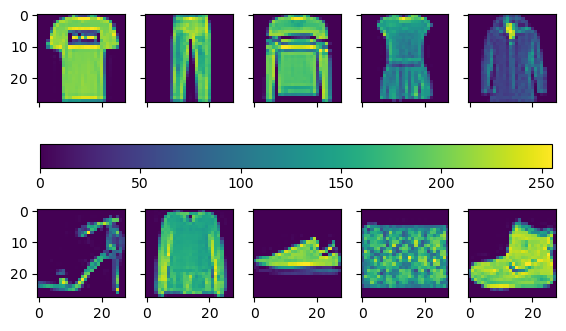

In [ ]:
fig, axs = plt.subplots(2,5)

im = axs[0,0].imshow(train_images[1])
axs[0,1].imshow(train_images[16])
axs[0,2].imshow(train_images[5])
axs[0,3].imshow(train_images[3])
axs[0,4].imshow(train_images[19])
axs[1,0].imshow(train_images[8])
axs[1,1].imshow(train_images[18])
axs[1,2].imshow(train_images[6])
axs[1,3].imshow(train_images[23])
axs[1,4].imshow(train_images[0])

# hide x labels and tick labels for top plots and y ticks for all but left plots
for ax in axs.flat:
    ax.label_outer()

# add colorbar to the middle
cbar_ax = fig.add_axes([0.07, 0.475, 0.8, 0.05])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

plt.tight_layout(rect=[0, 0, 0.9, 1])

In [8]:
clothing_class = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
# scaling images
train_images = train_images / 255.0
validation_images = validation_images / 255.0

/tmp/ipykernel_411485/3087927497.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


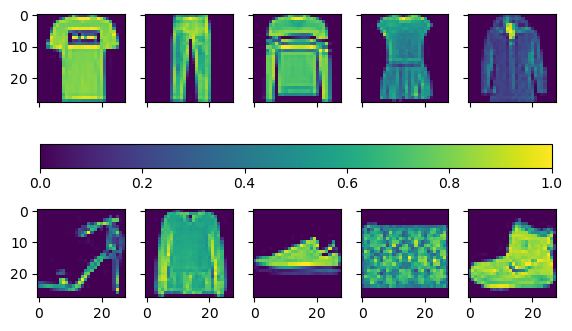

In [ ]:
# checking the effect of scaling
fig, axs = plt.subplots(2,5)

im = axs[0,0].imshow(train_images[1])
axs[0,1].imshow(train_images[16])
axs[0,2].imshow(train_images[5])
axs[0,3].imshow(train_images[3])
axs[0,4].imshow(train_images[19])
axs[1,0].imshow(train_images[8])
axs[1,1].imshow(train_images[18])
axs[1,2].imshow(train_images[6])
axs[1,3].imshow(train_images[23])
axs[1,4].imshow(train_images[0])

# hide x labels and tick labels for top plots and y ticks for all but left plots
for ax in axs.flat:
    ax.label_outer()

# add colorbar to the middle
cbar_ax = fig.add_axes([0.07, 0.475, 0.8, 0.05])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

plt.tight_layout(rect=[0, 0, 0.9, 1])

# Part 2: Building the model

## Base model

In [11]:
set_seed()

bmodel = models.Sequential()

# extract low-level features with 32 kernels of 3x3
bmodel.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
# dimensionality reduction + translation invariance
bmodel.add(layers.MaxPooling2D((2,2)))

# extract more complex features 
bmodel.add(layers.Conv2D(64, (3,3), activation='relu'))
bmodel.add(layers.MaxPooling2D((2,2)))

bmodel.add(layers.Conv2D(64, (3,3), activation='relu'))

bmodel.add(layers.Flatten())
bmodel.add(layers.Dense(64, activation='relu'))
bmodel.add(layers.Dense(10))


/home/imibrahim/.conda/envs/optima/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
bmodel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#compiling model
bmodel.compile(optimizer='adam',
               loss=SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [14]:
# training model
hist0 = bmodel.fit(train_images, train_labels, epochs=10, validation_data = (validation_images, validation_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.7490 - loss: 0.6955 - val_accuracy: 0.8660 - val_loss: 0.3696
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8774 - loss: 0.3345 - val_accuracy: 0.8836 - val_loss: 0.3153
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8961 - loss: 0.2806 - val_accuracy: 0.8912 - val_loss: 0.2942
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9079 - loss: 0.2474 - val_accuracy: 0.8921 - val_loss: 0.2959
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9187 - loss: 0.2216 - val_accuracy: 0.9021 - val_loss: 0.2786
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9268 - loss: 0.1973 - val_accuracy: 0.9044 - val_loss: 0.2792
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9315 - loss: 0.1806 - val_accuracy: 0.9071 - val_loss: 0.2750
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9397 -

In [15]:
# computing test accuracy
score0 = bmodel.evaluate(validation_images, validation_labels, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9082 - loss: 0.3436


In [22]:
def gen_losscurve(history):
    # plotting loss curve
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylim(0,1)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

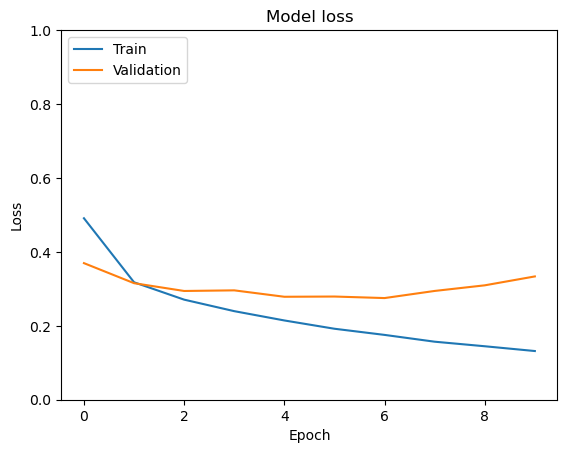

In [23]:
gen_losscurve(hist0)

In [24]:
def gen_cm(model):
    # get predictions
    y_pred = np.argmax(model.predict(validation_images), axis=1)
    y_true = np.argmax(validation_labels, axis=1) if validation_labels.ndim > 1 else validation_labels

    # create confusion matrix
    cm = tf.math.confusion_matrix(y_true, y_pred).numpy()
    
    # plotting the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                )
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


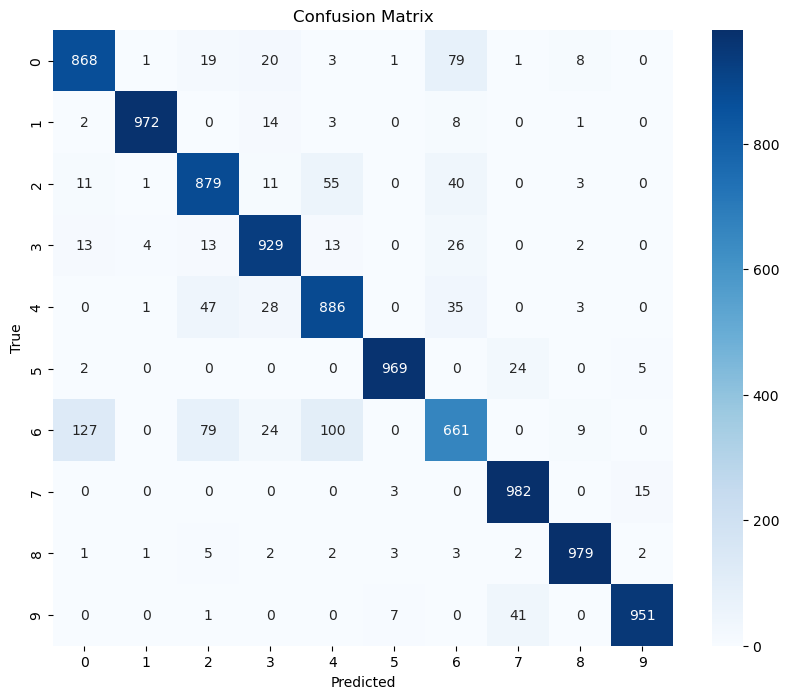

In [25]:
gen_cm(bmodel)

## Model 2 (Dropout)

- Adding a dropout layer to prevent overfitting

In [26]:
set_seed()

model2 = models.Sequential()

# extract low-level features with 32 kernels of 3x3
model2.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
# dimensionality reduction + translation invariance
model2.add(layers.MaxPooling2D((2,2)))

# extract more complex features 
model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(64, (3,3), activation='relu'))

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
# adding a dropout layer
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10))

#compiling model
model2.compile(optimizer='adam',
               loss=SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

/home/imibrahim/.conda/envs/optima/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# training model
hist2 = model2.fit(train_images, train_labels, epochs=10, validation_data = (validation_images, validation_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.6764 - loss: 0.8987 - val_accuracy: 0.8471 - val_loss: 0.4178
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8420 - loss: 0.4439 - val_accuracy: 0.8776 - val_loss: 0.3335
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8699 - loss: 0.3657 - val_accuracy: 0.8876 - val_loss: 0.3059
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8852 - loss: 0.3275 - val_accuracy: 0.8911 - val_loss: 0.3030
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8945 - loss: 0.2979 - val_accuracy: 0.8959 - val_loss: 0.2925
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9020 - loss: 0.2754 - val_accuracy: 0.9008 - val_loss: 0.2834
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9085 - loss: 0.2552 - val_accuracy: 0.9027 - val_loss: 0.2841
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9129 -

In [28]:
# computing test accuracy
score2 = model2.evaluate(validation_images, validation_labels, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9052 - loss: 0.3192


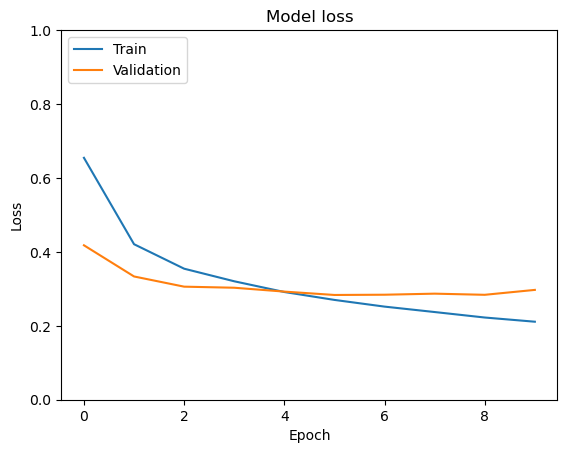

In [29]:
gen_losscurve(hist2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


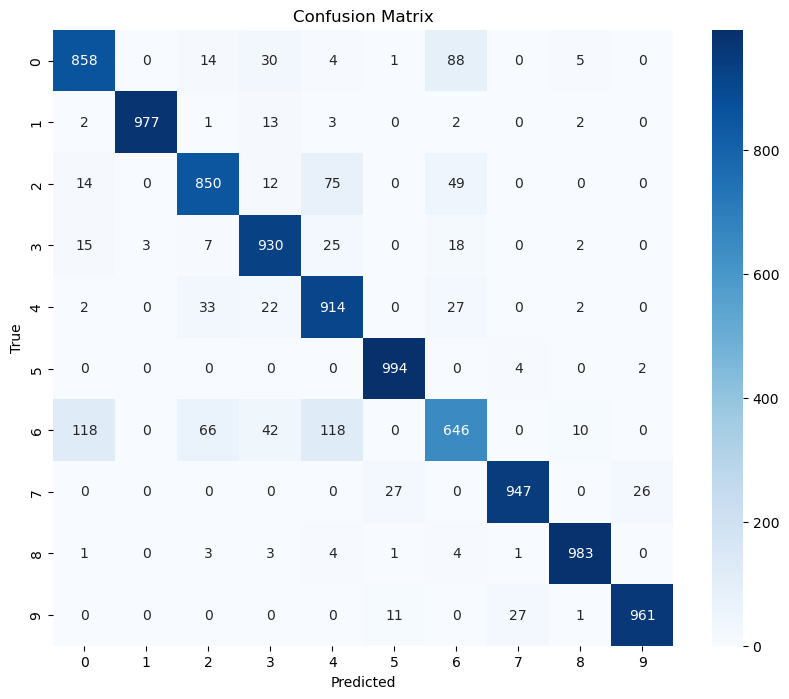

In [30]:
gen_cm(model2)

## Model 3 (stacked kernels)
- Adding subsequent convolution layer 

In [31]:
set_seed()

model3 = models.Sequential()

# extract low-level features with 32 kernels of 3x3
model3.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
# dimensionality reduction + translation invariance
model3.add(layers.MaxPooling2D((2,2)))

# extract more complex features 
model3.add(layers.Conv2D(64, (3,3), activation='relu'))
model3.add(layers.Conv2D(64, (3,3), activation='relu'))
model3.add(layers.MaxPooling2D((2,2)))

model3.add(layers.Conv2D(64, (3,3), activation='relu'))

model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
# adding a dropout layer
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(10))

#compiling model
model3.compile(optimizer='adam',
               loss=SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

/home/imibrahim/.conda/envs/optima/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# training model
hist3 = model3.fit(train_images, train_labels, epochs=10, validation_data = (validation_images, validation_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.6764 - loss: 0.8865 - val_accuracy: 0.8405 - val_loss: 0.4273
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8463 - loss: 0.4315 - val_accuracy: 0.8718 - val_loss: 0.3392
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8741 - loss: 0.3547 - val_accuracy: 0.8891 - val_loss: 0.3062
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8889 - loss: 0.3105 - val_accuracy: 0.8944 - val_loss: 0.2860
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8974 - loss: 0.2864 - val_accuracy: 0.8976 - val_loss: 0.2846
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9073 - loss: 0.2633 - val_accuracy: 0.9004 - val_loss: 0.2832
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9137 - loss: 0.2419 - val_accuracy: 0.8999 - val_loss: 0.2851
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9173 -

In [33]:
# computing test accuracy
score3 = model3.evaluate(validation_images, validation_labels, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9066 - loss: 0.3067


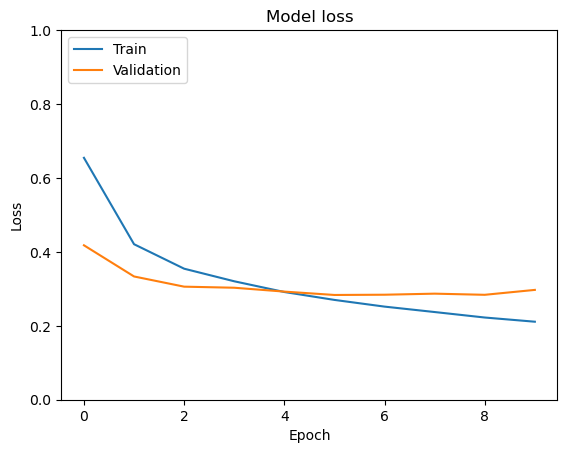

In [ ]:
gen_losscurve(hist3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


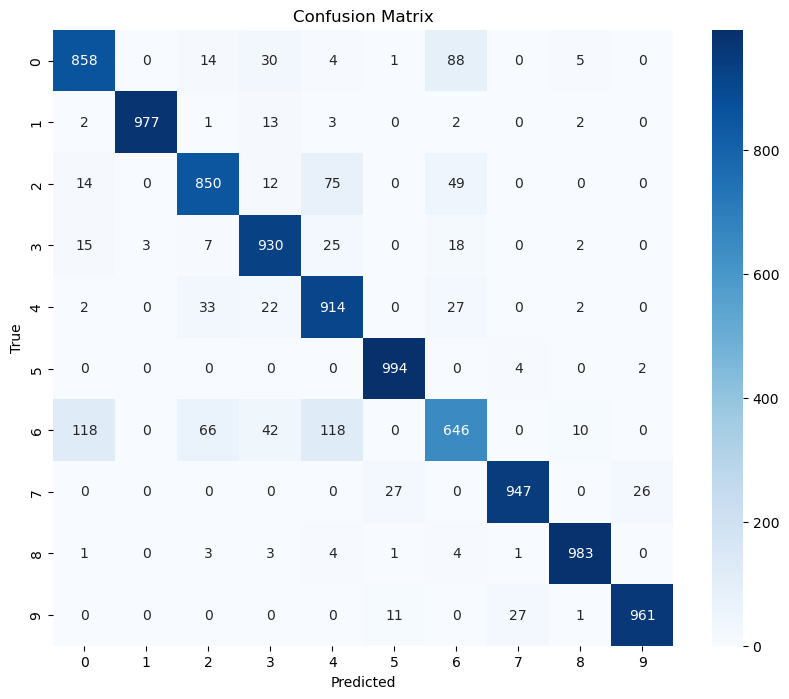

In [ ]:
gen_cm(model3)

## Model 4
- Increase filter size

In [34]:
set_seed()

model4 = models.Sequential()

# extract low-level features with 32 kernels of 3x3
model4.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
# dimensionality reduction + translation invariance
model4.add(layers.MaxPooling2D((2,2)))

# extract more complex features 
model4.add(layers.Conv2D(64, (3,3), activation='relu'))
model4.add(layers.Conv2D(64, (3,3), activation='relu'))
model4.add(layers.MaxPooling2D((2,2)))

model4.add(layers.Conv2D(128, (3,3), activation='relu'))

model4.add(layers.Flatten())
model4.add(layers.Dense(64, activation='relu'))
# adding a dropout layer
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(10))

#compiling model
model4.compile(optimizer='adam',
               loss=SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

/home/imibrahim/.conda/envs/optima/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# training model
hist4 = model4.fit(train_images, train_labels, epochs=10, validation_data = (validation_images, validation_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.6710 - loss: 0.9025 - val_accuracy: 0.8486 - val_loss: 0.4188
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8475 - loss: 0.4377 - val_accuracy: 0.8784 - val_loss: 0.3300
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8734 - loss: 0.3572 - val_accuracy: 0.8890 - val_loss: 0.3103
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8897 - loss: 0.3164 - val_accuracy: 0.8913 - val_loss: 0.3022
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8992 - loss: 0.2824 - val_accuracy: 0.8972 - val_loss: 0.3067
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9071 - loss: 0.2613 - val_accuracy: 0.9062 - val_loss: 0.2749
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9126 - loss: 0.2378 - val_accuracy: 0.9032 - val_loss: 0.2891
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9198 -

In [36]:
# computing test accuracy
score4 = model4.evaluate(validation_images, validation_labels, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9099 - loss: 0.3224


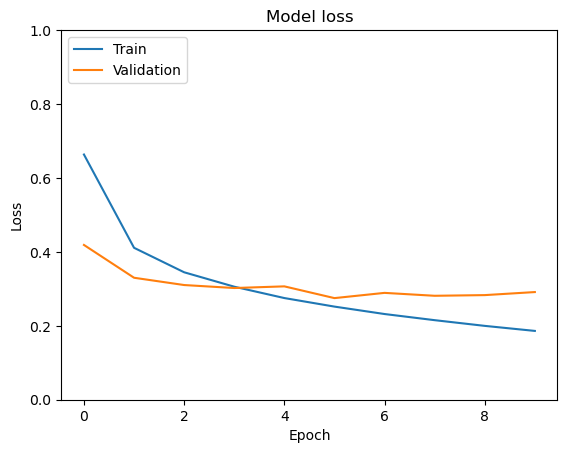

In [37]:
gen_losscurve(hist4)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


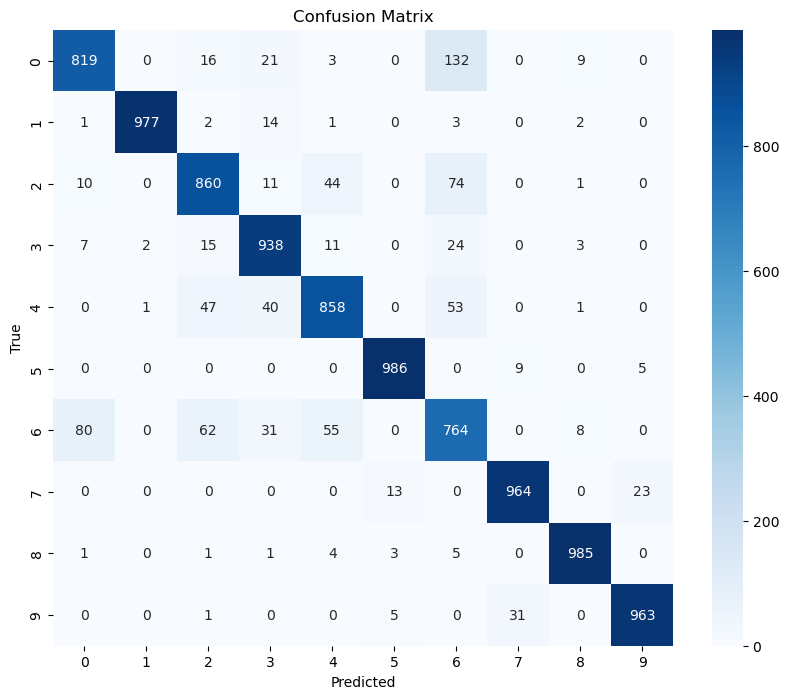

In [38]:
gen_cm(model4)

## Model 5 (Putting it all together)
- Stacked kernels
- Progressively increase filter sizes

In [43]:
set_seed()

model5 = models.Sequential()

# extract low-level features with 32 kernels of 3x3
model5.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model5.add(layers.Conv2D(32, (3,3), activation='relu'))
# dimensionality reduction + translation invariance
model5.add(layers.MaxPooling2D((2,2)))

# extract more complex features 
model5.add(layers.Conv2D(64, (3,3), activation='relu'))
model5.add(layers.Conv2D(64, (3,3), activation='relu'))
model5.add(layers.MaxPooling2D((2,2)))

model5.add(layers.Conv2D(128, (3,3), activation='relu'))
model5.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))

model5.add(layers.Flatten())
model5.add(layers.Dense(64, activation='relu'))
# adding a dropout layer
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(10))

#compiling model
model5.compile(optimizer='adam',
               loss=SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

/home/imibrahim/.conda/envs/optima/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# training model
hist5 = model5.fit(train_images, train_labels, epochs=10, validation_data = (validation_images, validation_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.6757 - loss: 0.8902 - val_accuracy: 0.8562 - val_loss: 0.3934
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.8617 - loss: 0.4057 - val_accuracy: 0.8820 - val_loss: 0.3339
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.8878 - loss: 0.3201 - val_accuracy: 0.8945 - val_loss: 0.3014
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9052 - loss: 0.2752 - val_accuracy: 0.8994 - val_loss: 0.2822
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9142 - loss: 0.2486 - val_accuracy: 0.9084 - val_loss: 0.2781
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9215 - loss: 0.2247 - val_accuracy: 0.9015 - val_loss: 0.3075
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9277 - loss: 0.2018 - val_accuracy: 0.9093 - val_loss: 0.2767
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9314 -

In [45]:
# computing test accuracy
score5 = model5.evaluate(validation_images, validation_labels, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9036 - loss: 0.3608


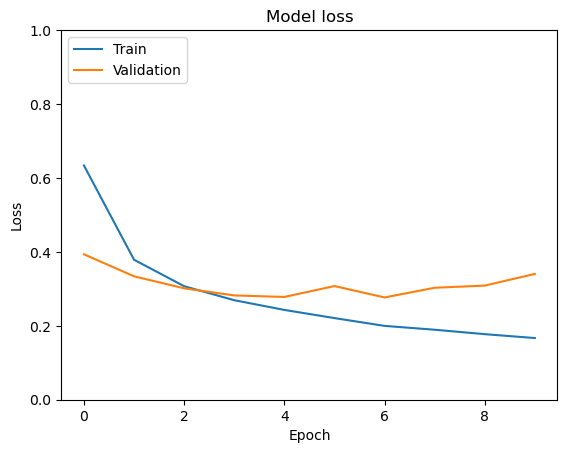

In [46]:
gen_losscurve(hist5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


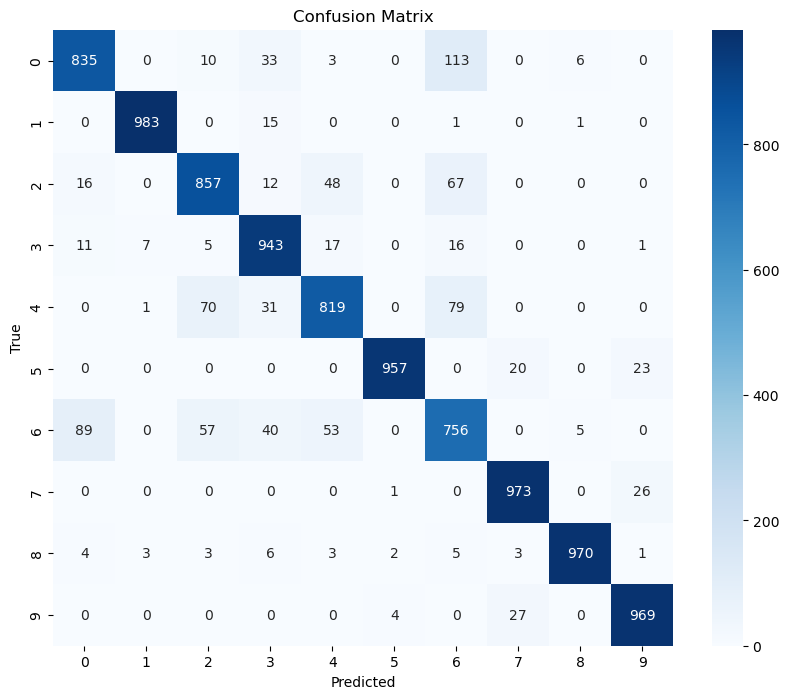

In [47]:
gen_cm(model5)